# Workspace

A workspace contains the current state: the *active config*, the *active scorestrucutre*,
a playback engine, etc. Many actions, like note playback, notation rendering, etc.,
use the active workspace to determine tempo, score structure, default playback instrument,
etc.


## Contents

* [The active workspace](#The-active-workspace)
* [Parts of a Workspace](#Parts-of-a-Workspace)
    * [Active Config](#The-active-Config)
    * [Environment](#Environment)
    * [Dynamics](#Dynamics)
* [Testing Dynamics: Berio's "O King"](#Testing-dynamics)

In [1]:
from maelzel.core import *
from IPython.display import display

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


## The active workspace

To customize a Workspace for a specific task there are three slightly different methods:

#### 1. Modify the active Workspace

We modify the workspace by setting a new configuration

In [2]:
w = getWorkspace()
config = w.config.clone({
    'play.numChannels': 4,
    'show.pngResolution': 300,
    'quant.complexity': 'high'
})
w.config = config

#### 2. Create a new Workspace with the needed customizations

In [3]:
w = Workspace(scorestruct=ScoreStruct(timesig=(3, 4), quarterTempo=72),
              updates={'play.numChannels': 4,
                       'show.pngResolution': 300,
                       'quant.complexity': 'high'})
w.activate()

Workspace(name=Workspace-1, scorestruct=ScoreStruct(tempo=72, timesig=(3, 4)), dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

#### 3. Temporary Workspace (as context manager)

Chain([4C:0.5♩, 4C#:0.5♩, 4D:0.5♩, 4D#:0.5♩, 4E:0.5♩, 4F:0.5♩, 4F#:0.5♩, 4G:0.5♩, 4G#:0.5♩, 4A:0.5♩, …])
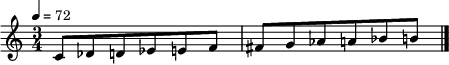

OfflineRenderer(sr=44100)
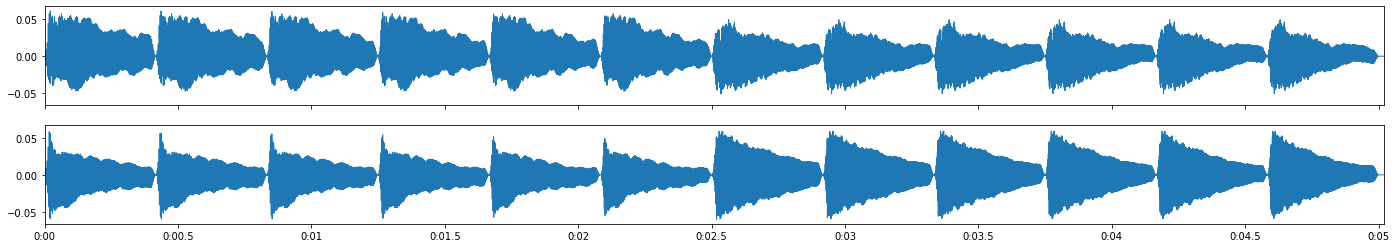

In [4]:
with Workspace(scorestruct=ScoreStruct(timesig=(3, 4), quarterTempo=72)):
    scale = Chain(Note(m, dur=0.5) for m in range(60, 72))
    display(scale)
    display(scale.rec())

-----

## Parts of a Workspace

The workspace bundles the different elements which determine playback, notation and general behaviour of **maelzel.core**

* `.config`: holds the active configuration
* `.scorestruct`: the active score structure
* `.dynamicsCurve`: determines the mapping between amplitude and musical dynamic. This is used for playback and transcription
* `.a4`: the reference frequency for A4
* `.renderer`: used internally when rendering offline. When an object (note, chord, voice, …) is played it uses this attribute to check how to route the generated playback events

### The active Config

The `.config` attribute of the active Workspace holds the active configuration. This is a subclass of `dict` and holds defaults and customizations regarding playback, notation, etc

In [5]:
config = w.config
assert config is getConfig()
config

Key,Value,Type,Descr
A4,442,between 10 - 10000,"Freq. of the Kammerton A4. Normal values are 440, 442, 443 or 432 for old tuning, but any 'fantasy' value can be used"
splitAcceptableDeviation,4,type: int,"When splitting notes between staves, notes within this range of the split point will be grouped together if they all fit"
chord.arpeggio,auto,"{auto, False, True}","Arpeggiate notes of a chord when showing. In auto mode, only arpeggiate when needed"
chord.adjustGain,True,type: bool,"Adjust the gain of a chord according to the number of notes, to prevent clipping"
m21.displayhook.install,True,type: bool,None
m21.displayhook.format,xml.png,"{lily.png, xml.png}",None
m21.fixStream,True,type: bool,"If True, fix the streams returned by .asmusic21 (see m21fix)"
repr.showFreq,False,type: bool,Show frequency when calling printing a Note in the console
semitoneDivisions,4,"{1, 2, 4}","The number of divisions per semitone (2=quarter-tones, 4=eighth-tones)"
dynamicCurve.shape,expon(0.3),type: str,"The shape used to create the default dynamics curve. The most convenient shape is some variation of an exponential, given as expon(exp), where exp is the exponential used. exp < 1 will result in more resolution for soft dynamics"


### Environment

Some aspects of the environment can be queried through the Workspace

* `recordPath()`: returns the path where recordings are placed whenever the user does not give an absolute path
* `presetsPath()`: presets created via `defPreset` are saved in this path and loaded in future sessions. 

In [6]:
w.recordPath()

'/tmp/maelzel'

In [7]:
w.presetsPath()

'/home/em/.local/share/maelzel/core/presets'

### Dynamics

*Mapping dynamic expressions to amplitudes*

The dynamic curve within the active Workspace is used to map dynamics to amplitude for playback, or to transcribe amplitudes as dynamics


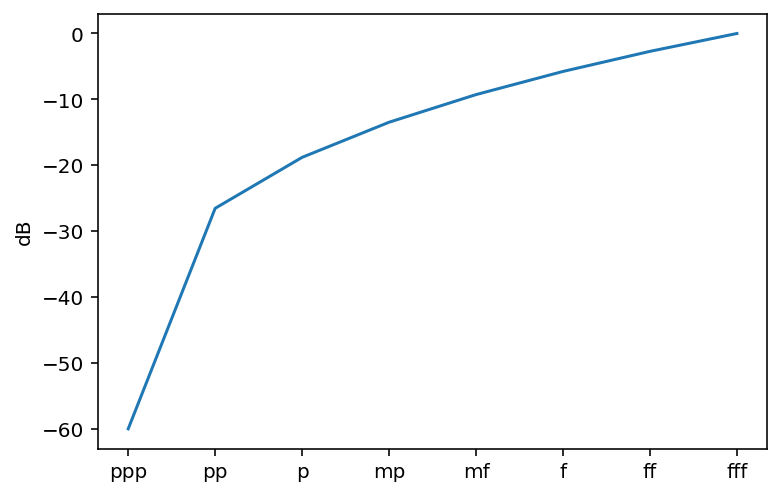

In [8]:
w.dynamicCurve.plot()

### Testing dynamics

### Luciano Berio, "O King"

![](assets/oking1.png)

Chain([4F:4♩, 4A:2.5♩, 4F, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩, 4F, 4A:1.5♩, …])
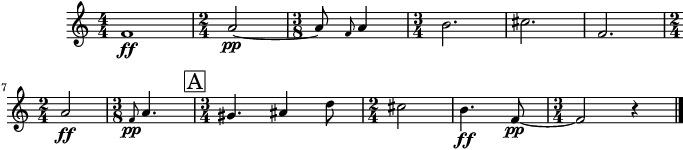

In [7]:
from maelzel.core import *

events = [
    "4F:4:ff",
    "4A:2.5:pp",
    "4F:0",    # dur=0 indicates a grace note
    "4A:1:pp",
    "4B:3",
    "5C#:3",
    "4F:3",
    "4A:2:ff",
    "4F:0:pp",
    "4A:1.5:pp",
    "4Ab:1.5",
    "4Bb:1",
    "5D:.5",
    "5C#:2",
    "4B:1.5:ff",
    "4F:2.5:pp"
]
voice = Chain(events)
voice

Set the score structure to match the original. Either the `.scorestruct` attribute can be modified directly or the function `setScoreStruct` can be used

Chain([4F:4♩, 4A:2.5♩, 4F, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩, 4F, 4A:1.5♩, …])
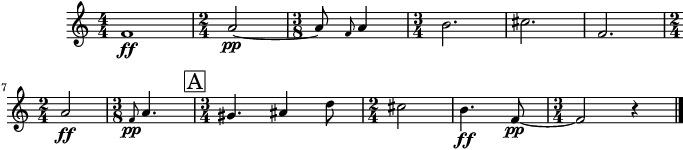

In [9]:
w = getWorkspace()
w.scorestruct = ScoreStruct('''
  4/4, 60
  2/4
  3/8
  3/4
  .
  .
  2/4
  3/8
  3/4,,A
  2/4
  .
  3/4
  4/4
  3/4
  4/4
  3/4
  2/4
  4/4
  .
  2/4,,B
''')
voice

Play with the default instr ( piano, with pedal

OfflineRenderer(sr=44100)
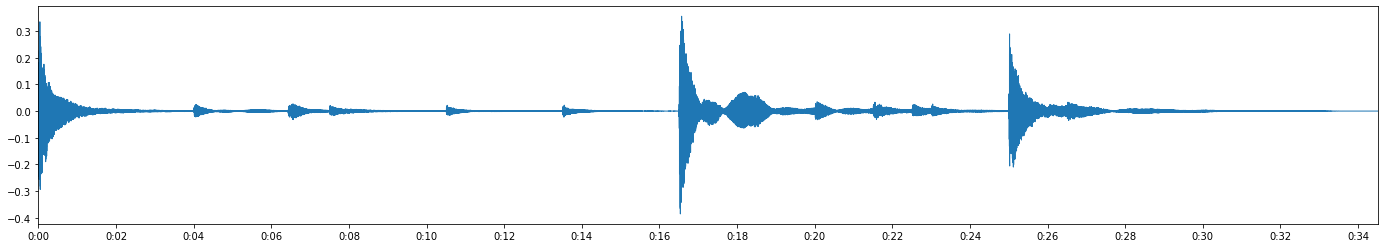

In [10]:
# voice.play(instr='piano', sustain=8, gain=2)

voice.rec("assets/oking.ogg", instr='piano', sustain=8, nchnls=1, gain=2)

A dynamic curve with less contrast

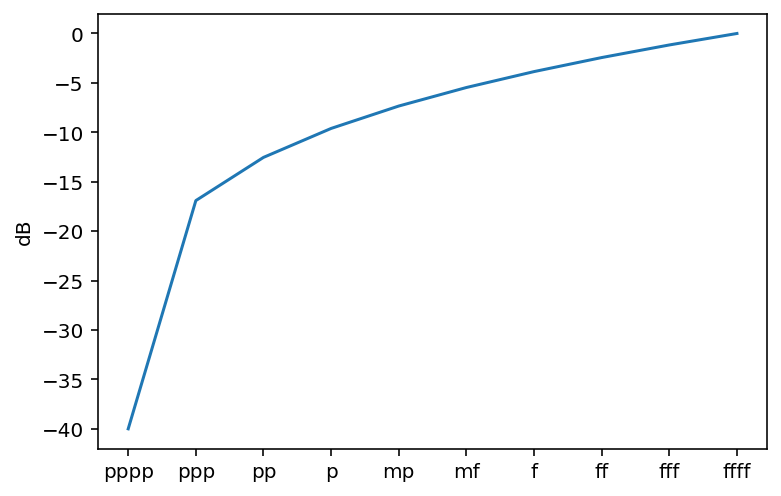

In [5]:
dyncurve = DynamicCurve.fromdescr(shape='expon(0.25)', mindb=-40)
dyncurve.plot()

OfflineRenderer(sr=44100)
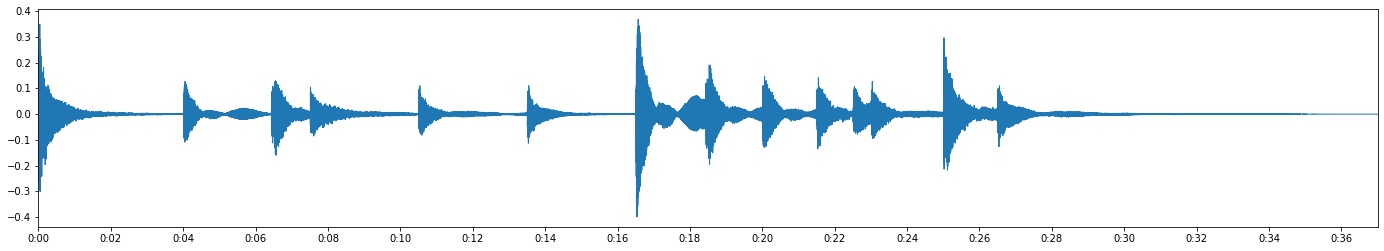

In [6]:
with Workspace(dynamicCurve=dyncurve):
    renderer = voice.rec("assets/oking2.ogg", instr='piano', sustain=8, gain=2, nchnls=1)
renderer